# Wyscout Events Data Loading
### Get the Wyscout data from a JSON file to a Pandas dataframe.
### As an example, we will look for all shots on goal during the match.

In [2]:
import pandas as pd
import json
from IPython.display import display
import zipfile
from pathlib import Path

In [10]:
base_path = './input/wyscout'

# You can adjust the match_id according to your assigned task
match_id = "5414103"

file_name = match_id + '.json'

In [4]:
# This function reads the wyscout_eventdata (JSON file) and converts it to a
# pandas DataFrame.
# The Wyscout data consists of
#  - A meta part (which is empty)
#  - An events part.
# We are interested in the events part of the DataFrame.

def wyscout_json_to_df(file_name):
    match_id = file_name[:-5]

    # Create the input_dir if it does not exist
    unzip_dir = Path("./" + base_path + '/' + f"{match_id}/")

    if not unzip_dir.exists():
        unzip_dir.mkdir(parents=True, exist_ok=True)

    # Extract the zip file
    zip_file = f"./input/wyscout/{match_id}.zip"

    with zipfile.ZipFile(zip_file, 'r') as zip_ref:
        zip_ref.extractall(unzip_dir)

    with open(base_path + f"/{match_id}" + '/' + file_name, encoding='utf8') as f:
        js = json.load(f)
        df = pd.json_normalize(js['events'])
    return df

## Let's have a look at the keys which are converted into columns in the pandas DataFrame

In [11]:
df_events = wyscout_json_to_df(file_name)

#save df to csv
if not Path("./results/wyscout/").exists():
        Path("./results/wyscout/").mkdir(parents=True, exist_ok=True)

df_events.to_csv(f"./results/wyscout/{match_id}_df_events.csv")

FileNotFoundError: [Errno 2] No such file or directory: '/input/wyscout/5414103/5414103.json'

In [6]:
print(df_events.columns, "\n")

NameError: name 'df_events' is not defined

In [7]:
df_events.head()

NameError: name 'df_events' is not defined

In [ ]:
df_events

,id,matchId,matchPeriod,minute,second,matchTimestamp,videoTimestamp,relatedEventId,shot,groundDuel,...,groundDuel.takeOn,groundDuel.side,groundDuel.relatedDuelId,possession,shot.goalkeeper,location,carry.progression,carry.endLocation.x,carry.endLocation.y,infraction.opponent
0,1615272856,5414103,1H,0,5,00:00:05.650,6.650953,1.615273e+09,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1615272858,5414103,1H,0,8,00:00:08.640,9.640166,1.615273e+09,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1615272585,5414103,1H,0,11,00:00:11.653,12.653879,1.615273e+09,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1615272859,5414103,1H,0,13,00:00:13.533,14.533728,1.615273e+09,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1615272860,5414103,1H,0,15,00:00:15.373,16.373945,1.615273e+09,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1524,1615274276,5414103,2H,95,23,01:35:23.138,5920.138835,1.615274e+09,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1525,1615274277,5414103,2H,95,24,01:35:24.473,5921.473681,1.615274e+09,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1526,1615273732,5414103,2H,95,27,01:35:27.009,5924.009912,1.615274e+09,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1527,1615273733,5414103,2H,95,30,01:35:30.400,5927.400774,1.615274e+09,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_shots = df_events[(df_events['type.primary']=='shot') | (df_events['type.primary']=='penalty')]

In [ ]:
# The total number of shots and penalties is
print(len(df_shots), "\n")

18 



In [ ]:
# To see if there was a goal among these shots, one can print
print(df_shots['shot.isGoal'], "\n")

40      False
205     False
380      True
566     False
592     False
689     False
766      True
769     False
1006    False
1014    False
1022    False
1125    False
1177    False
1202    False
1226    False
1259     True
1345    False
1458    False
Name: shot.isGoal, dtype: object 



In [ ]:
# (Warning: own goals are not seen as a shot attempt)
# To get the shots which only resulted in goals, one can filter the dataframe by
df_goals = df_shots[df_shots['shot.isGoal']==True]

In [ ]:
# To display the time, team, player and type of goal, one can use
display(df_goals[['matchTimestamp', 'team.name', 'player.name', 'type.primary']])

,matchTimestamp,team.name,player.name,type.primary
380,00:23:08.626,Kazakhstan,M. Samorodov,shot
766,00:46:14.107,Slovenia,D. Brekalo,shot
1259,01:17:31.888,Slovenia,Ž. Vipotnik,shot


In [ ]:
#the shots on target column is either true or false, we can modify them to visualize
df_shots['shot.onTarget']

40      False
205     False
380      True
566      True
592      True
689     False
766      True
769     False
1006    False
1014     True
1022    False
1125    False
1177    False
1202    False
1226    False
1259     True
1345    False
1458     True
Name: shot.onTarget, dtype: object

C:\Users\nicgr\AppData\Local\Temp\ipykernel_2220\3374521651.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='On Target', y='Count', data=on_target_count, palette=palette)


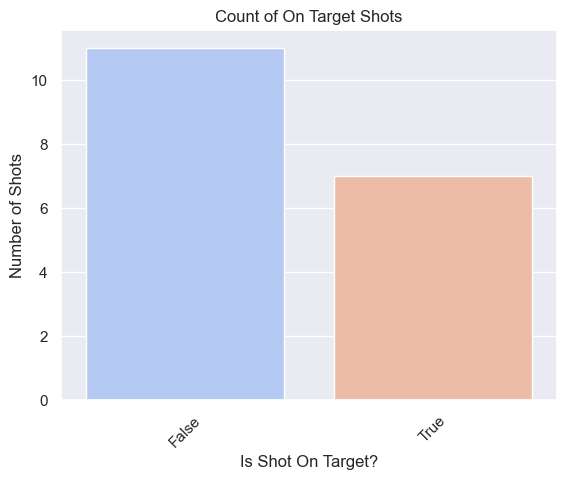

In [ ]:
# we need seaborn and matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

#we count the on target (true) and off target shots (false)
on_target_count = df_shots['shot.onTarget'].value_counts().reset_index()

# Rename the columns for better readability
on_target_count.columns = ['On Target', 'Count']

# Apply a Seaborn theme
sns.set_theme(style="darkgrid")

# Choose a color palette for the plot
palette = sns.color_palette("coolwarm", len(on_target_count))

# Create the bar chart with the chosen palette
sns.barplot(x='On Target', y='Count', data=on_target_count, palette=palette)

# Set the title of the plot
plt.title('Count of On Target Shots')

# Customize further with Seaborn and Matplotlib
plt.xlabel('Is Shot On Target?') # X-axis label
plt.ylabel('Number of Shots')    # Y-axis label

# Optional: Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()